In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd

In [53]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [56]:
# reflecting a database into a new model means to transfer the contents of the database into a different
# structure of data
# use the automap_base() function

# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(engine, reflect=True)


In [57]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [60]:
#find the most recent date

prevs_year = dt.date(2017, 8, 23)

prevs_year

datetime.date(2017, 8, 23)

In [61]:
# find the date one year back

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# now we have prev_year set to the date that is one year before the 2017 original date
prev_year

datetime.date(2016, 8, 23)

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
results = []


# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)
# the filter function eliminates all data after the date (2016, 8, 23)
# .all() function saves the results to a list
# print(results)


# Print the results
## print(results.all())

# When you test print the results, you will see that there is a list result. Results is a list of tuples.
# Each tuple contains the ('date', 'prcp in inches')

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

df

# Set the index of the dataframe using set_index()
# Let's say we want the index column to be the date column
# setting inplace=True means we do not want to createa a new dataframe
df.set_index(df['date'], inplace=True)

df

# Now, print the dataframe without the index
## print(df.to_string(index=False))
# You can see that there are not two date columns in this example, because we set (index=False)




# Sort the dataframe by date
df = df.sort_index()

print(df.to_string(index=False))
#df = df.sort_values(['date'])

# Use Pandas Plotting with Matplotlib to plot the data


      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 2016-08-23 to 2017-08-23
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2230 non-null   object 
 1   precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.3+ KB


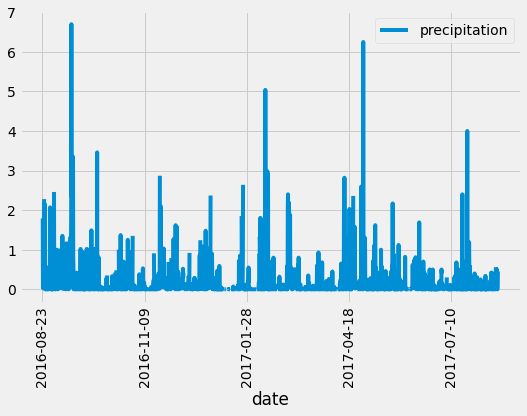

In [64]:
# now use matplotlib to plot the data

df.plot(figsize = (8,5))

plt.tick_params(axis='x', labelrotation=90)


In [65]:
# Generate he summary statistics

df.describe()

# This is the statistics for all rain between the dates 2016-8-23 and 2017-8-23

# The count is the number of times precipitation was observed
# The mean is the average precipitation score

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [66]:
# How many stations are available in this dataset?

session.query(func.count(Station.station)).all()

# After running the query we can see that there are 9 stations collecting data for our dataset.

# However, to truly answer W. Avy's question, we don't just need to know the number of stations, we need to know how
# active the stations are as well

# THAT IS - we want to figure our which stations tend to have the most precipitation recordings.



[(9,)]

In [67]:
# Begin 9.3.3

session.query(Measurement.station, func.count(Measurement.station))

In [69]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# As we view the results below, the station_id is listed on the left
# and the number of rain events (AKA rain activity) is on the right

# This means that station USC00519281 is the most active station with 2772 rain events.

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# What are the most active stations?
# This means that station USC00519281 is the most active station with 2772 rain events.

# List the stations and the counts in descending order.


In [71]:
# begin the query to find the temperatures

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


# Next, lets modify the query to filter out everything but the station the W. Avy is interested in
# this is done by adding '.\filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [74]:
# 9.3.4 Begins

# Lets ensure all stakeholders know all information they need about the station closest to your proposed shop locale.

# Lets create a plot that shows all of the temperatures in a given year for the station with the highest
# number of temperature obsevations

# SO: Station with the highest number of temperature observations, we are going to show all of the temperatures over
# overy the year

# Create a query for the temperature observations.

# results = session.query(Measurement.tobs).\
# filter(Measurement.station == 'USC00519281')

# Apply another filter to only include the most recent year

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >=prev_year).all()

print(results)



[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [80]:
# store the results of the query into a pandas dataframe

df = pd.DataFrame(results, columns = ['tabs'])

df

print(df)

     tabs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


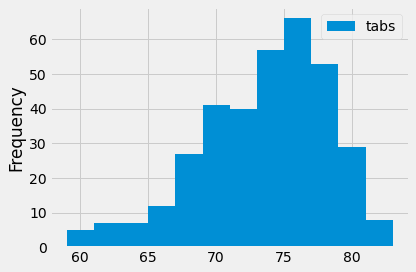

In [84]:
# Plot the Highest Number of Observations

# We are creating a histogram to accomplish this

# When creating a histogram you need to figure out how many bins you need. Its good to stay between 5 to 20 bins.
# good fit is one that highlights the areas where there is a lot of data and the areas where there is not a lot of
# data.

# We selected 12 bins to divide our temps.

df.plot.hist(bins=12)

plt.tight_layout()

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge